<a href="https://colab.research.google.com/github/yakash204/ml-projects/blob/main/Stock_price_prediction_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from sklearn.model_selection import  train_test_split
import time #helper libraries
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [7]:
!bash


/content# 
/content# 
/content# exit


In [8]:
company = 'RELI'
start = '01/01/2010'
end = '01/12/2020'

In [10]:
import investpy
df = investpy.get_stock_historical_data(stock=company,
                                        country='India',
                                        from_date=start,
                                        to_date=end)

In [14]:
df.head()

,Open,High,Low,Close,Volume,Currency
Date,,,,,,
2010-01-04,540.43,540.43,506.13,532.70,35372156,INR
2010-01-05,569.55,569.55,527.70,530.32,9872785,INR
2010-01-06,534.88,542.11,530.30,538.89,10933744,INR
2010-01-07,538.89,552.27,533.94,547.83,12090336,INR
2010-01-08,548.80,551.67,542.85,546.40,6973332,INR


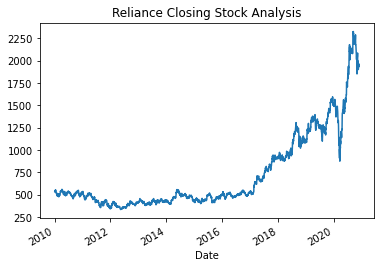

In [12]:
df['Close'].plot(label = "close")
plt.title('Reliance Closing Stock Analysis')
plt.show()


In [15]:
df= df.drop(['Open', 'High', 'Currency', 'Volume', 'Low'], axis = 1)

In [16]:
scaler = MinMaxScaler(feature_range=(0, 1))
df = scaler.fit_transform(df)

In [17]:
train_size = int(len(df) * 0.80)
test_size = len(df) - train_size
train, test = df[0:train_size,:], df[train_size:len(df),:]
print(len(train), len(test))

2166 542


In [18]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [19]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [20]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [27]:
#Step 2 Build Model
model = Sequential()

model.add(LSTM(
    50,
    input_dim=1,
    return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(
    100,
    return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(
    1))
model.add(Activation('linear'))

start = time.time()
model.compile(loss='mse', optimizer='rmsprop')
print ('compilation time : ', time.time() - start)

compilation time :  0.012816190719604492


In [30]:
model.fit(
    trainX,
    trainY,
    batch_size=128,
    epochs=10,
    validation_split=0.05)

Epoch 1/10
17/17 [==============================] - 5s 64ms/step - loss: 0.0079 - val_loss: 0.0592
Epoch 2/10
17/17 [==============================] - 0s 9ms/step - loss: 0.0035 - val_loss: 0.0428
Epoch 3/10
17/17 [==============================] - 0s 10ms/step - loss: 0.0026 - val_loss: 0.0356
Epoch 4/10
17/17 [==============================] - 0s 10ms/step - loss: 0.0016 - val_loss: 0.0173
Epoch 5/10
17/17 [==============================] - 0s 10ms/step - loss: 8.5647e-04 - val_loss: 0.0034
Epoch 6/10
17/17 [==============================] - 0s 9ms/step - loss: 2.4091e-04 - val_loss: 1.4228e-04
Epoch 7/10
17/17 [==============================] - 0s 9ms/step - loss: 1.6720e-04 - val_loss: 1.1720e-04
Epoch 8/10
17/17 [==============================] - 0s 10ms/step - loss: 1.4866e-04 - val_loss: 2.6463e-04
Epoch 9/10
17/17 [==============================] - 0s 11ms/step - loss: 1.8720e-04 - val_loss: 9.8331e-05
Epoch 10/10
17/17 [==============================] - 0s 11ms/step - loss: 1.

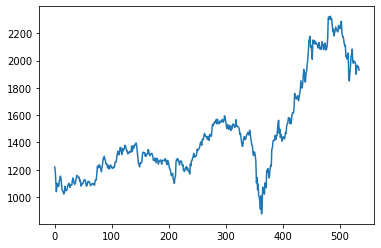

In [33]:
def plot_results_multiple(predicted_data, true_data,length):
    plt.plot(scaler.inverse_transform(true_data.reshape(-1, 1))[length:])
    plt.plot(scaler.inverse_transform(np.array(predicted_data).reshape(-1, 1))[length:])
    plt.show()
    

plot_results_multiple(predictions, testY, predict_length)